# FetchReach (random start pos) Experiments

In [2]:
%matplotlib notebook
from plot_utils import load_experiment, plot_traj_vs_model_pred, plot_goal_clouds

import numpy as np
import joblib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Experiment 1 - "standard params" but no PER

In [2]:
experiment_name = "default_params"
controller = load_experiment(experiment_name)

/home/hc19/PycharmProjects/long-range-planning-GANs/full_algorithm


/home/hc19/anaconda3/envs/deepRL/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.preprocessing.data module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.preprocessing. Anything that cannot be imported from sklearn.preprocessing is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/hc19/anaconda3/envs/deepRL/lib/python3.6/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.3 when using version 0.22. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


test the model (plot over 20 steps)

<IPython.core.display.Javascript object>


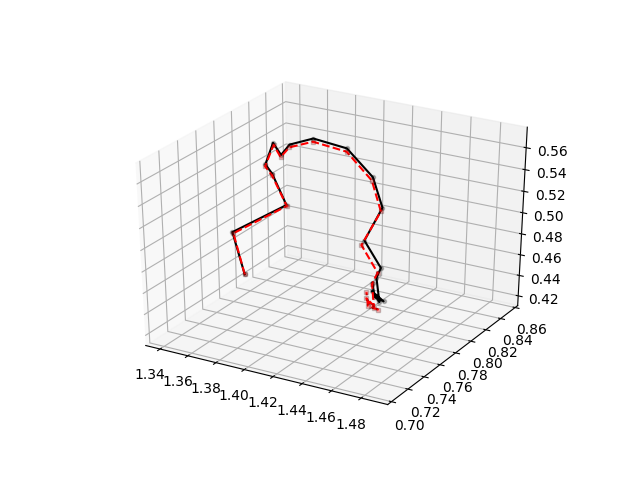

In [3]:
plot_traj_vs_model_pred(controller.model, controller.env)

looks very accurate

<IPython.core.display.Javascript object>


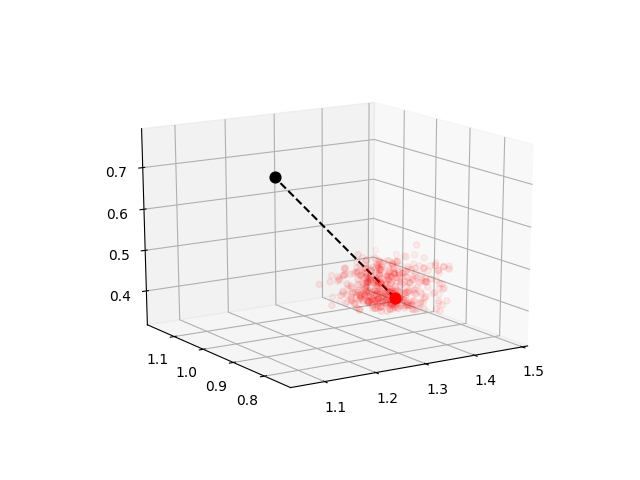

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [4]:
state = controller.gan.cg_state_scaler.inverse_transform(np.array([-0.00934646,  0.63374764, -1.1993216 ]).reshape(1,-1)).reshape(-1)
goal = controller.gan.cg_state_scaler.inverse_transform(np.array([-0.8914087,  1.8443041,  1.1627929]).reshape(1,-1)).reshape(-1)
plot_goal_clouds(controller.gan, state, goal, num_steps=1, num_points_per_cloud=500)

### Summary of evaluation:

100 evaluation runs: 100 successes, avg step count: 6.79 +/- 3.64

## Experiment 2 - as above but using PER buffer (just testing it doesn't do anything strange)

In [14]:
experiment_name = "fetchreach_per_test"
controller = load_experiment(experiment_name)

/home/henry/PycharmProjects/long-range-planning-GANs/full_algorithm


<IPython.core.display.Javascript object>


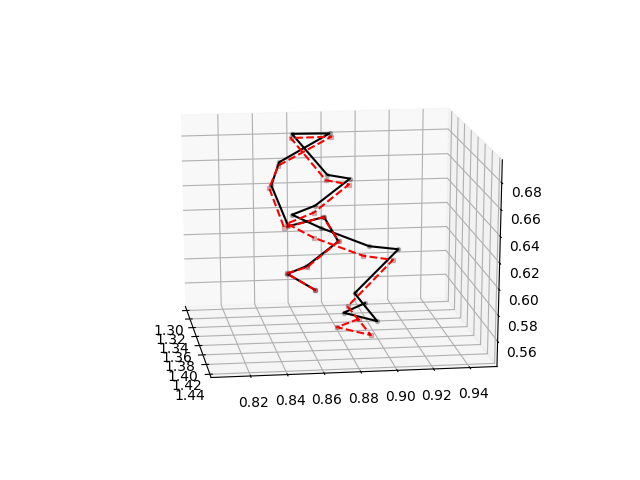

In [3]:
plot_traj_vs_model_pred(controller.model, controller.env)

<IPython.core.display.Javascript object>


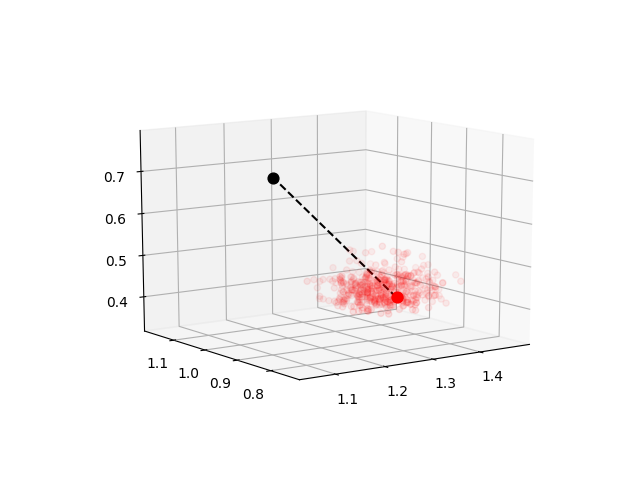

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [13]:
state = controller.gan.cg_state_scaler.inverse_transform(np.array([-0.00934646,  0.63374764, -1.1993216 ]).reshape(1,-1)).reshape(-1)
goal = controller.gan.cg_state_scaler.inverse_transform(np.array([-0.8914087,  1.8443041,  1.1627929]).reshape(1,-1)).reshape(-1)
plot_goal_clouds(controller.gan, state, goal, num_steps=1, num_points_per_cloud=500)

In [18]:
controller.full_eval()

In [21]:
full_eval_data = controller.full_eval_data

In [23]:
print(full_eval_data[0]["frac_success"])
print(str(np.mean(full_eval_data[0]["steps"])) + " +/- " + str(np.std(full_eval_data[0]["steps"])))

1.0
5.94 +/- 2.587740327003465


## Experiment 3 - noPER, traj_len=50, 2000 trajs only

In [24]:
experiment_name = "fetchreach_trajlen_50"
controller = load_experiment(experiment_name)

/home/henry/PycharmProjects/long-range-planning-GANs/full_algorithm


<IPython.core.display.Javascript object>


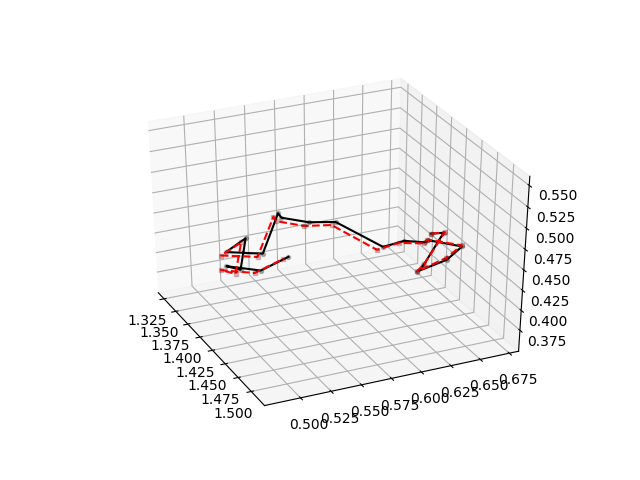

In [25]:
plot_traj_vs_model_pred(controller.model, controller.env)

<IPython.core.display.Javascript object>


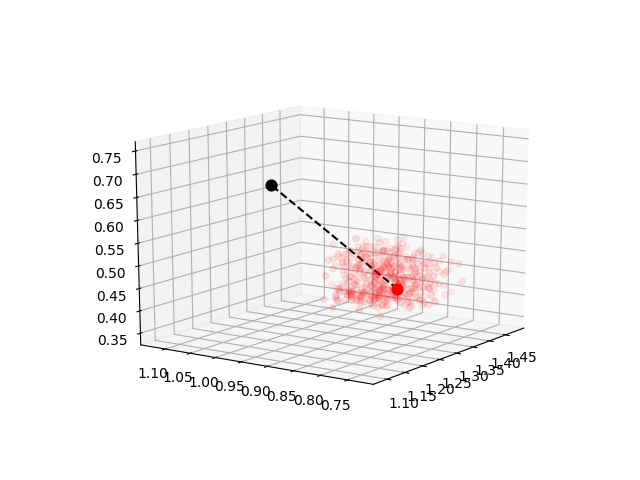

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [26]:
state = controller.gan.cg_state_scaler.inverse_transform(np.array([-0.00934646,  0.63374764, -1.1993216 ]).reshape(1,-1)).reshape(-1)
goal = controller.gan.cg_state_scaler.inverse_transform(np.array([-0.8914087,  1.8443041,  1.1627929]).reshape(1,-1)).reshape(-1)
plot_goal_clouds(controller.gan, state, goal, num_steps=1, num_points_per_cloud=500)

In [27]:
controller.full_eval()
full_eval_data = controller.full_eval_data
print(full_eval_data[0]["frac_success"])
print(str(np.mean(full_eval_data[0]["steps"])) + " +/- " + str(np.std(full_eval_data[0]["steps"])))

1.0
6.02 +/- 2.935915530120034


## Experiment 4 - as above but traj_len=25, num_trajs=4000

In [38]:
experiment_name = "fetchreach_trajlen_25"
controller = load_experiment(experiment_name)

/home/henry/PycharmProjects/long-range-planning-GANs/full_algorithm


<IPython.core.display.Javascript object>


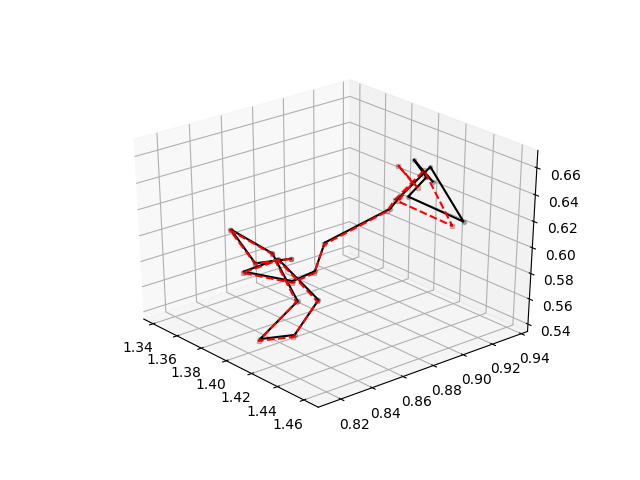

In [29]:
plot_traj_vs_model_pred(controller.model, controller.env)

<IPython.core.display.Javascript object>


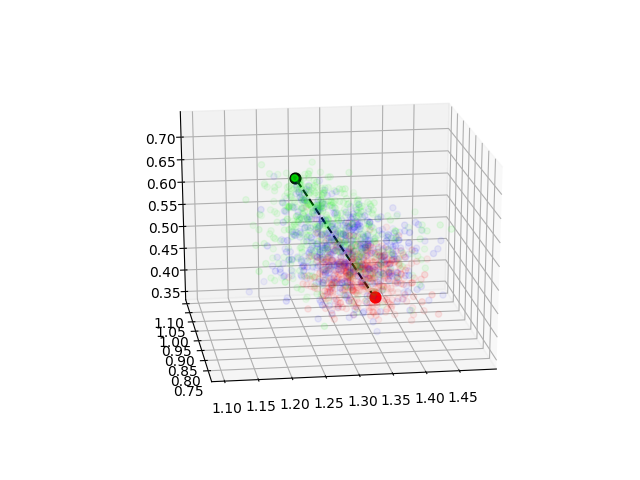

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [31]:
state = controller.gan.cg_state_scaler.inverse_transform(np.array([-0.00934646,  0.63374764, -1.1993216 ]).reshape(1,-1)).reshape(-1)
goal = controller.gan.cg_state_scaler.inverse_transform(np.array([-0.8914087,  1.8443041,  1.1627929]).reshape(1,-1)).reshape(-1)
plot_goal_clouds(controller.gan, state, goal, num_steps=3, num_points_per_cloud=500)

In [39]:
controller.full_eval()
full_eval_data = controller.full_eval_data
print(full_eval_data[0]["frac_success"])
print(str(np.mean(full_eval_data[0]["steps"])) + " +/- " + str(np.std(full_eval_data[0]["steps"])))

1.0
6.42 +/- 3.219254572102057


## Experiment 5 - traj_len=50, 200 trajs only, l2=0.002 noPER

In [40]:
experiment_name = "fetchreach_trajlen_50_200trajs_l2_0_002"
controller = load_experiment(experiment_name)

/home/henry/PycharmProjects/long-range-planning-GANs/full_algorithm


<IPython.core.display.Javascript object>


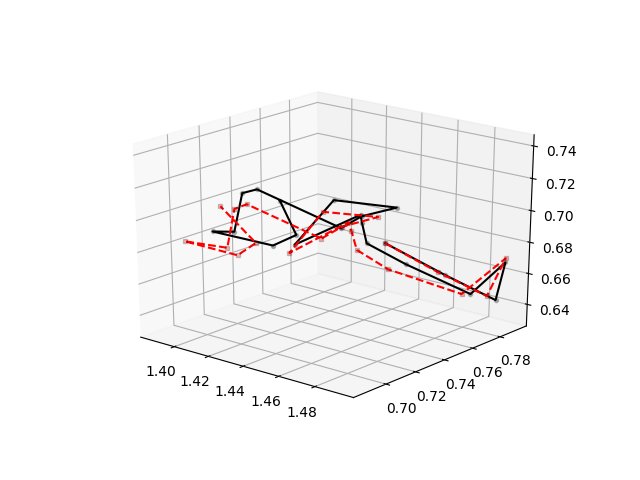

In [34]:
plot_traj_vs_model_pred(controller.model, controller.env)

<IPython.core.display.Javascript object>


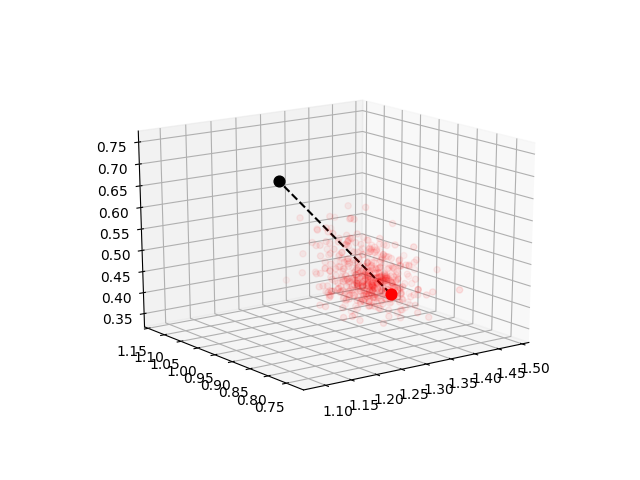

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [43]:
state = controller.gan.cg_state_scaler.inverse_transform(np.array([-0.00934646,  0.63374764, -1.1993216 ]).reshape(1,-1)).reshape(-1)
goal = controller.gan.cg_state_scaler.inverse_transform(np.array([-0.8914087,  1.8443041,  1.1627929]).reshape(1,-1)).reshape(-1)
plot_goal_clouds(controller.gan, state, goal, num_steps=1, num_points_per_cloud=500)

actually works very well - promising!! a few more outliers but that's not actually a bad thing here

In [41]:
controller.full_eval()
full_eval_data = controller.full_eval_data
print(full_eval_data[0]["frac_success"])
print(str(np.mean(full_eval_data[0]["steps"])) + " +/- " + str(np.std(full_eval_data[0]["steps"])))

1.0
7.9 +/- 3.848376280978771


## Experiment 6 - standard (noPER) 2000 trajs tau=10

In [44]:
experiment_name = "fetchreach_2000trajs_tau_10"
controller = load_experiment(experiment_name)

/home/henry/PycharmProjects/long-range-planning-GANs/full_algorithm


<IPython.core.display.Javascript object>


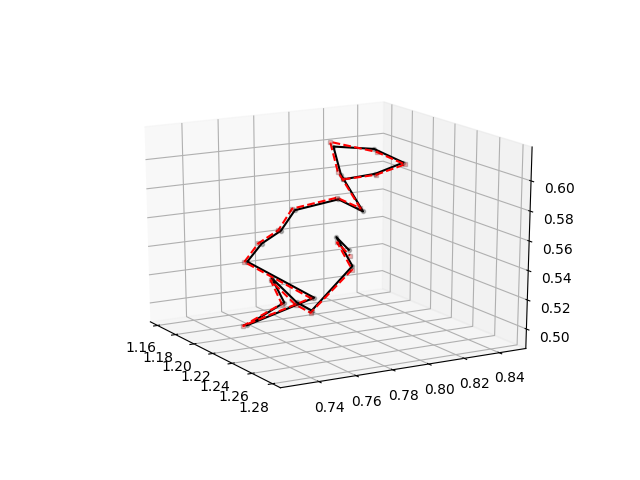

In [45]:
plot_traj_vs_model_pred(controller.model, controller.env)

<IPython.core.display.Javascript object>


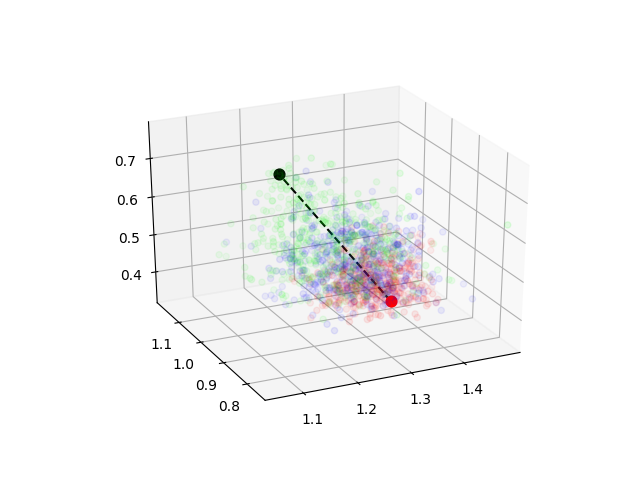

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [47]:
state = controller.gan.cg_state_scaler.inverse_transform(np.array([-0.00934646,  0.63374764, -1.1993216 ]).reshape(1,-1)).reshape(-1)
goal = controller.gan.cg_state_scaler.inverse_transform(np.array([-0.8914087,  1.8443041,  1.1627929]).reshape(1,-1)).reshape(-1)
plot_goal_clouds(controller.gan, state, goal, num_steps=3, num_points_per_cloud=500)

In [48]:
controller.full_eval()
full_eval_data = controller.full_eval_data
print(full_eval_data[0]["frac_success"])
print(str(np.mean(full_eval_data[0]["steps"])) + " +/- " + str(np.std(full_eval_data[0]["steps"])))

1.0
6.52 +/- 3.971095566717074


## Experiment 7 - traj_len=50 noPER, 400 init random trajectories, then 1000 extra trajectories added using planner (so definite success) - 500 training batches after each trajectory

In [6]:
experiment_name = "fetchreach_extra_trajs_after_random"
controller = load_experiment(experiment_name)

/home/hc19/PycharmProjects/long-range-planning-GANs/full_algorithm


/home/hc19/anaconda3/envs/deepRL/lib/python3.6/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.3 when using version 0.22. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


<IPython.core.display.Javascript object>


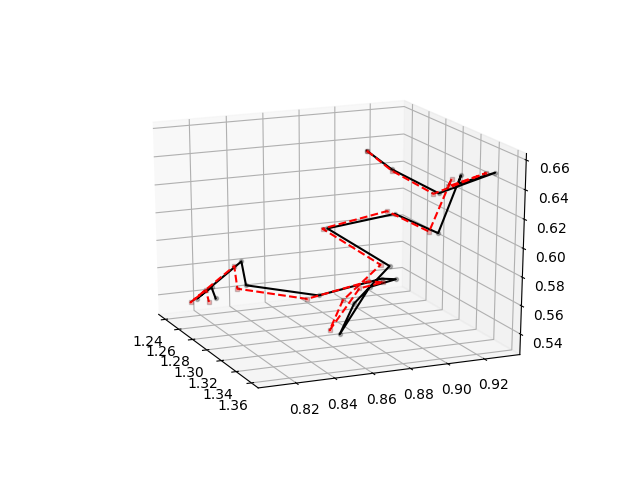

In [5]:
plot_traj_vs_model_pred(controller.model, controller.env)

<IPython.core.display.Javascript object>


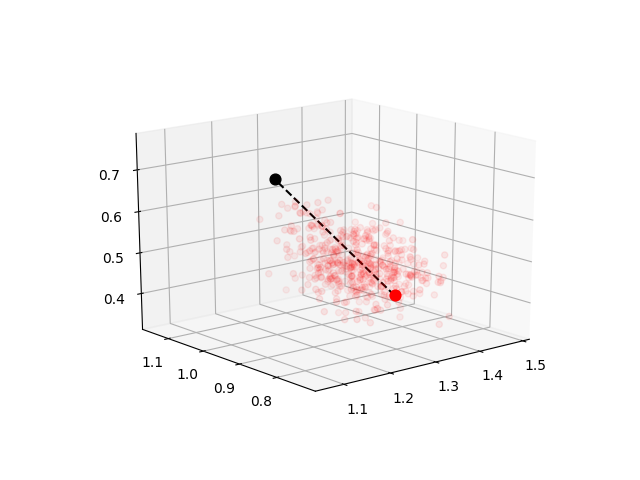

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [7]:
state = controller.gan.cg_state_scaler.inverse_transform(np.array([-0.00934646,  0.63374764, -1.1993216 ]).reshape(1,-1)).reshape(-1)
goal = controller.gan.cg_state_scaler.inverse_transform(np.array([-0.8914087,  1.8443041,  1.1627929]).reshape(1,-1)).reshape(-1)
plot_goal_clouds(controller.gan, state, goal, num_steps=1, num_points_per_cloud=500)

when we train on additional data after random this makes a substantial difference

In [8]:
full_eval_data = joblib.load("experiments/"+experiment_name+"/full_eval_data.pkl")

In [12]:
steps = []
success = []
for dat in full_eval_data:
    steps.append(np.mean(dat["steps"]))
    success.append(dat["frac_success"])

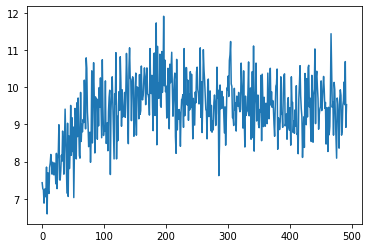

In [17]:
%matplotlib inline
plt.plot(steps)

surprising that it takes more steps than when trained on random data

# FetchPush Experiments

## Experiment 1 - standard params, 20000 initial trajectories, traj_len=50, noPER

In [3]:
experiment_name = "fetch_push_noPER_tl_50"
controller = load_experiment(experiment_name)

/home/hc19/PycharmProjects/long-range-planning-GANs/full_algorithm


/home/hc19/anaconda3/envs/deepRL/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.preprocessing.data module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.preprocessing. Anything that cannot be imported from sklearn.preprocessing is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/hc19/anaconda3/envs/deepRL/lib/python3.6/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.3 when using version 0.22. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


<IPython.core.display.Javascript object>


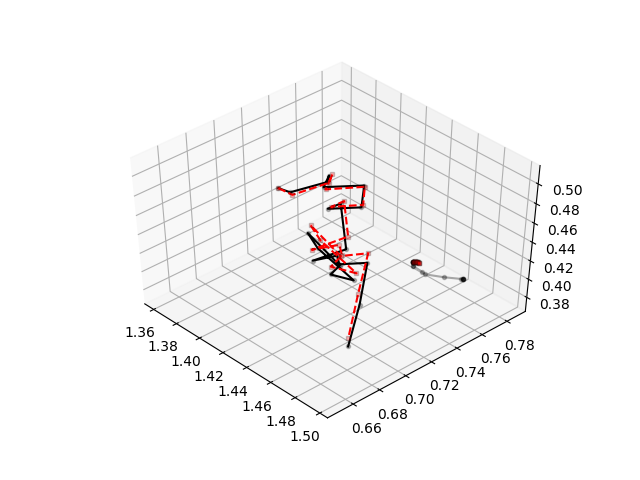

In [9]:
plot_traj_vs_model_pred(controller.model, controller.env, object=True)

<IPython.core.display.Javascript object>


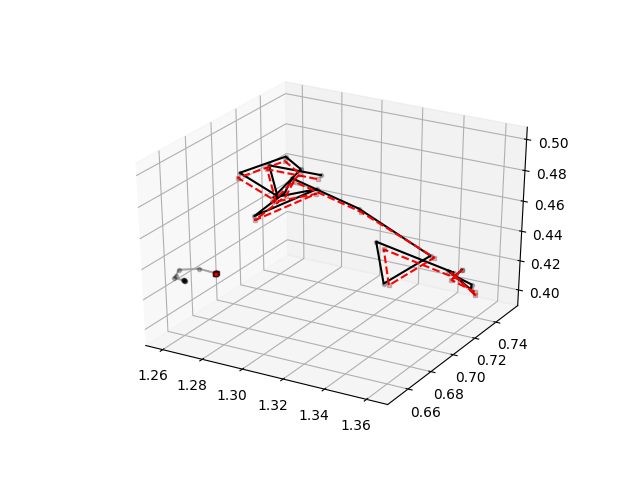

In [45]:
plot_traj_vs_model_pred(controller.model, controller.env, object=True)

<IPython.core.display.Javascript object>


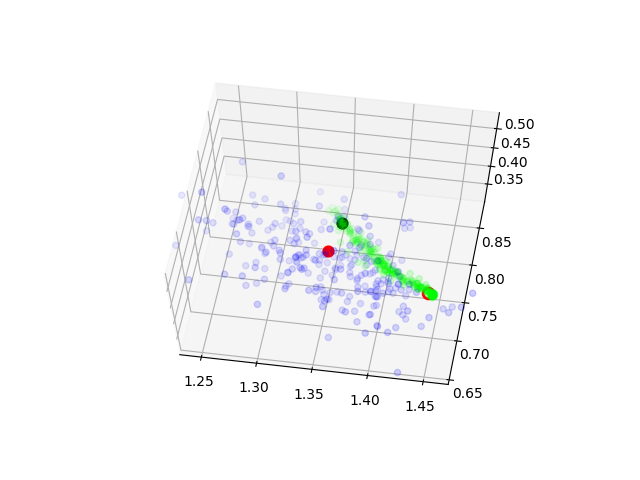

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [8]:
from plot_utils import plot_goal_clouds_object
obs = controller.env.reset()
plot_goal_clouds_object(controller.gan, obs["observation"][:6], obs["desired_goal"], num_steps=1, num_points_per_cloud=250)

#note: full red is current robot pos. white with red is object pos. black is goal